<a href="https://colab.research.google.com/github/bacdam91/Swinburne-Summer-Scholarship-Project/blob/master/Jnr_Dev_ML_Talk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning

### by Bac Trach Dam

#### A Jnr Dev Talk

##### March 2020

## Agenda

1. About me
2. What is Machine Learning (ML)?
3. Application of ML
4. The fundamentals
5. Fashion MNIST dataset
6. Recommended resources
7. Q&A
8. PSA (Coronavirus)


## About me

![Who am I](https://drive.google.com/uc?id=1AKZBPjcNJpCp5zAnk3sYS0Y9Jb0ocZE8)

* Bac Trach Dam
* Bachelor of Pharmacy - Pharmacist (Part-time)
* Study at Swinburne University of Technology
* Research assistance at Swinburne
    - Third-party library (TPL) Recommender System (RS) using Convolutional Graph Neural Network (CGNN)
* Frontend developer at a medical startup
    - ReactJS, ExpressJS, NodeJS, MySQL, AWS



## What is ML?

![AI movies](https://drive.google.com/uc?id=1OpxedW6srtH0UPdOsiBv_YkXxmDZX-bp)

### Artificial Intelligence (AI) vs Machine Learning (ML)

* AI is a concept/feature within a system
* ML is the implementation that gives a systems the AI capabilities
    - Involves Data Science
    - Advancing field due to:
        1. Massive computing power of modern hardware
        2. Massive data - **Data Science**

## The Fundamentals

Types of ML problems
1. Regression
    - Predicting a value from a continuum
        - House prices
2. Classification 
    - Assigning a discreet class from a number of classes
        - Cat or Dog

**Types of ML problem is determined by how the problem is defined**
![catdog](https://drive.google.com/uc?id=1nd3Dw8UYK0vMxoDOh8AdKh7Gflks2RZk)

### The basic steps to ML

1. Collect the data to the problem
2. Prepare the data
3. Build the algorithm
4. Train the algorithm
5. Predict with the algorithm
6. Finetuning




## Illustration of the fundamentals



In [0]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We collected some data. Let's say it's the exchange rate between the Australian Dollar and the New Zealand Dollar, (~1:1).

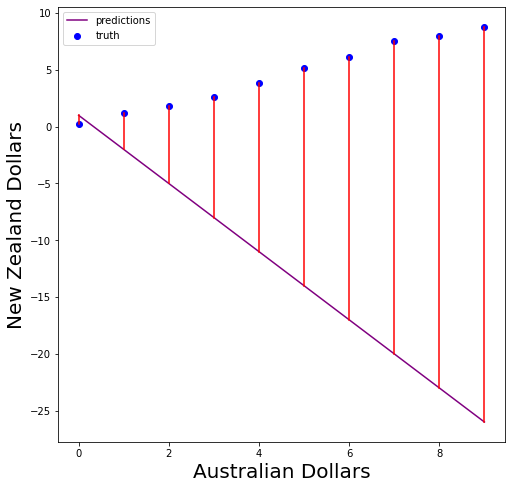

In [0]:
# Data
import random

dataCount = 10
collectedData = np.array([0.2, 1.2, 1.8, 2.6, 3.8, 5.2, 6.1, 7.5, 8, 8.8])

ourIntuition = np.array([i for i in range(0, 10)])

theta = random.randint(-3, 3);
bias = random.randint(-3, 3)
predictions = np.array([(theta * x + bias) for x in range(0, 10) ])

df=pd.DataFrame({'x': range(0, dataCount), 'truth': collectedData, "intuition" : ourIntuition, 'predictions': predictions}, dtype="float32")
plt.figure(figsize=(8, 8))
plt.scatter( 'x', 'truth', data=df, marker='o', color='blue')

# Extra plots
# plt.plot('x', 'intuition', data=df, color="green")
plt.plot('x', 'predictions', data=df, color="purple")

# Plotting lines of errors
for row in df.to_numpy():
    plt.plot([row[0], row[0]], [row[1], row[3]], color="red")

plt.xlabel('Australian Dollars', fontsize=20)
plt.ylabel('New Zealand Dollars', fontsize=20)
plt.legend()



Our intuition tells us that the line of best fit follows the linear equation $y = mx + c$

Similar in ML

$y' = \theta X + b$

$y$ = the truth (the label)

$y'$ = the prediction

$\theta$ = the weight

$X$ = input

$x$ = attributes

$b$ = the bias


## Root Means Square Error

$RMSE = \sqrt{\frac{1}{n}(\sum_{i=1}^{n}(y' - y)^{2})}$

In [0]:
def RMSE(myDf, columns):
    myDf.columns = columns
    errors = myDf.diff(axis=1)
    squared_errors = errors ** 2
    rmse = (sum(squared_errors[columns[1]]) / len(myDf)) ** 0.5
    return (rmse, squared_errors['predictions'])

In [0]:
rmse, squared_errors = RMSE(df[['truth', 'predictions']], ["labels", "predictions"])

print('Theta (gradient): %s' % theta)
print('Bias (y-intercept): %s' % bias)
print('RMSE: %.f' % rmse)

Theta (gradient): 1
Bias (y-intercept): -2
RMSE: 2


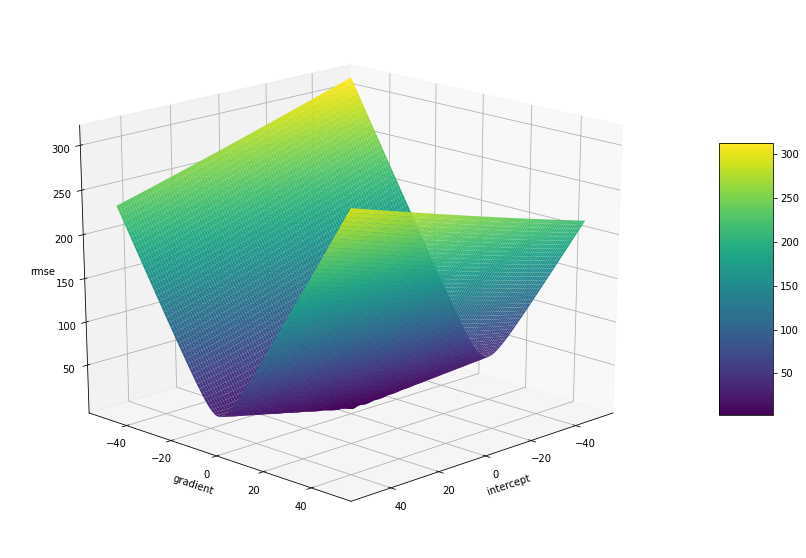

In [0]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits import mplot3d  # noqa: F401 unused import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n = 50
M, C = np.meshgrid(np.arange(-n,n, dtype="float64"),np.arange(-n,n, dtype="float64"))

Z = np.array([[0 for i in range(n * 2)] for j in range(n * 2)],dtype="float64")
count = len(collectedData)
for i in range(count):
    Z += ((M * i) + C - collectedData[i])**2
Z = (Z / count)**0.5

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(C, M, Z, rstride=1, cstride=1, cmap="viridis", edgecolor="none")

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel("intercept")
ax.set_ylabel("gradient")
ax.set_zlabel("rmse")
ax.view_init(20, 45)

plt.show()

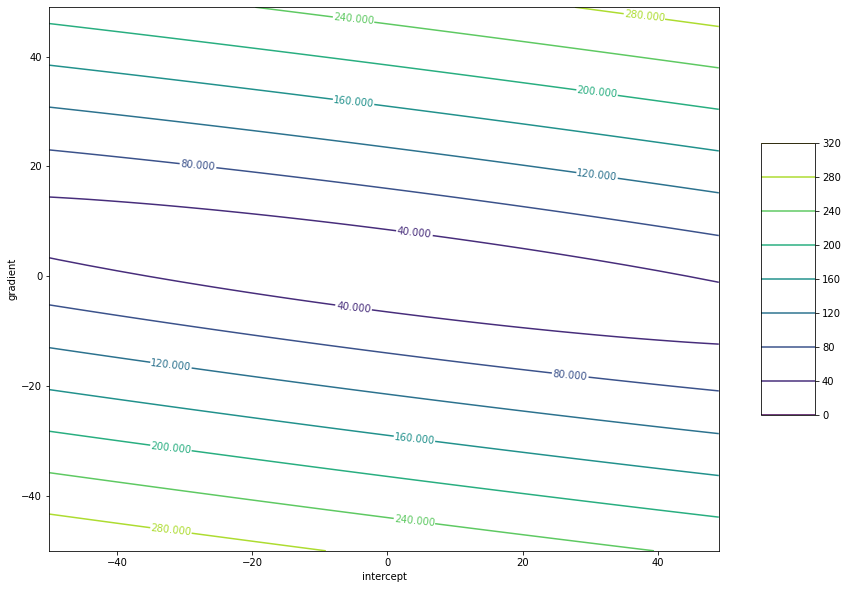

In [0]:
fig = plt.figure(figsize=(15,10))

ax = plt.axes()

surf = ax.contour(C, M, Z)
ax.clabel(surf, inline=1, fontsize=10)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel("intercept")
ax.set_ylabel("gradient")

plt.show()

We can use differentiation to tell us the slope of the loss curve to tell us how to tune our parameters.



## MNIST Dataset

### The Hello World of ML

Resource: https://mxnet.apache.org/api/python/docs/tutorials/packages/gluon/image/mnist.html

In [0]:
!pip install mxnet

     |████████████████████████████████| 68.7MB 58kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


# Training a simple Multi-Layered Perceptron network with the Fashion MNIST Dataset

In this code-and-tell, we will create a simple Multi-Layered Perceptron network using the MXNet library and train it with the Fashion MNIST Dataset.

### Fashion MNIST dataset

The Fashion MNIST dataset is a collection of $28 \times 28$ pixels greyscale images of clothing items. Each item is associated with a scalar label, a number, to identify the particular clothing item. 

Between this and the handwritten digits MNIST dataset, they are considered the "Hello World" tutorials of the Machine Learning world.

### Importing libraries

We will be importing some libraries for this tutorial.
* ```mxnet.nd```: provides us the `NDArray` toolset for storing and transforming data. By design, `NDArray` is similar to `Numpy`'s multi-deminesional array.
* ```mxnet.gluon.```: provides us with functions to create a neural net 
* ```mxnet.autograd```: provides us with functions to calculate the derivatives and loss
* ```mxnet.gluon.data.vision.datasets```: helps us to load the Fashion MNIST dataset
* ```mxnet.gluon.data.vision.transforms```: helps us to transform the computer vision datasets
* ```matplotlib.pyplot```: helps us to output the dataset as drawings
* ```time```: helps us with benchmarking

In [0]:
from mxnet import nd, gluon, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
import matplotlib.pyplot as plt
import time

### Downloading the dataset

Almost all Machine Learning libraries/frameworks provide a convenient method to download standard datasets, such the as Fashion MNIST. As such we will use MXNet's convenient method to download the dataset and inspect its first item.

Notice that the parameter ```train``` is set to ```True```. We are saying we would like to load the training set only. If set to ```False``` we will load the testing set. We will do that later.

__Note:__ As the Fashion MNIST is a standard dataset used for benchmarking, the dataset is of fixed sized and split for us. The reason for this is to prevent a more favourable randomisation and splitting. There are 60,000 examples in the training set and 10,000 examples in the test set.

In [0]:
mnist_train = datasets.FashionMNIST(train=True)
X, y = mnist_train[0]
("X shape: ", X.shape, "X dtype: ", X.dtype, "y: ", y)

('X shape: ', (28, 28, 1), 'X dtype: ', numpy.uint8, 'y: ', 2)

As we can see from the output, the ```X``` is a numpy array that is $28 \times 28 \times 1$. The dimensions stand for $height \times width \times channel$. The ```y``` is the label which tells us what the item is. In this case the first item is a pullover. All the items include:

0. t-shirt
1. trouser
2. pullover
3. dress
4. coat
5. sandal
6. shirt
7. sneaker
8. bag
9. ankle boot

As the dataset stores these labels as integers, we will need an array of these text labels so that we can read the the network's prediction and easy evaluate the accuracy of the neural network.

In [0]:
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

### Exploring the dataset with ```matplotlib```

Let's explore the dataset some more and see its visual representations with ```matplotlib```.  We won't go into too much of the code of ```matplotlib``` in this tutorial. However, there are some videos on the basic usage of ```matplotlib``` on this channel.

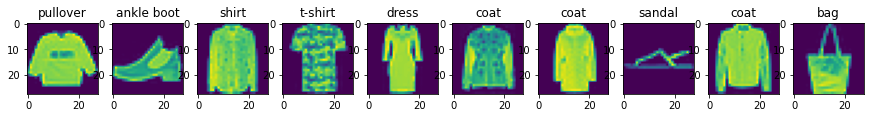

In [0]:
X, y = mnist_train[0:10]
# plot images
fig, ax = plt.subplots(1, X.shape[0], figsize=(15, 15))
for f, xi, yi in zip(ax, X, y):
    # 3D->2D by removing the last channel dim
    f.imshow(xi.reshape((28,28)).asnumpy())
    f.set_title(text_labels[int(yi)])
plt.show()

### Transforming the data

In order to feed the data into a Gluon model, we need to transform the images into the (channel, height, width) format with floating point data type. We can do this with the ```transforms.ToTensor()``` method. In addition we will normalise all pixel values with ```transforms.Normalize()``` method. We can chain these two transforms together with ```transforms.Compose()``` which sequentially composes multiple transforms.

If you would like to understand these transforms in more details, you can check my channel for more tutorials.

In [0]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])
mnist_train = mnist_train.transform_first(transformer)

### Creating the training data

In order to use the data for training, we need to get a (randomised) batch of examples. We can achieve this with the ```gluon.data.Dataloader()``` method. We will define an arbitary batch size of 256 examples. To allow randomisation, we will set shuffle to ```True``` and number of workers to 4, which will allow us to process data in parallel. This is often necessary especially for complex data transforms. 

In [0]:
batch_size = 256
train_data = gluon.data.DataLoader(
    mnist_train, batch_size=batch_size, shuffle=True, num_workers=4)

The return object from ```gluon.data.DataLoader()``` is an iterable object but __does__ not support indexing so to examine a batch, we will use the ```for``` loop follows by a ```break``` statement immediately.

We will also print out the number of batches generated with the method ```len()```.

In [0]:
for data, label in train_data:
    print(data.shape, label.shape)
    break

print(len(train_data))

(256, 1, 28, 28) (256,)
235


Notice that there are 235 batches and we defined 256 examples in each batch. If we multiple the 2 figures we get, $235 \times 256 = 60,160$. As mentioned before, there are exactly 60,000 examples in the training set. If we remove the ```break``` statement and let the ```for``` loop print out the shape of all the mini-batches, we can see that the last batch has only 96 examples, which means $256 \times 234 + 96 = 60,000$.

### Preparing the testing data

Let's do the same method to get the test set ready for our neural network. 

Again, we can see that there are 40 batches: 256 examples in the first 39 batches and 16 examples in the last batch, $256 \times 39 + 16 = 10,000$.

In [0]:
mnist_valid = gluon.data.vision.FashionMNIST(train=False)
valid_data = gluon.data.DataLoader(
    mnist_valid.transform_first(transformer),
    batch_size=batch_size, num_workers=4)

for data, label in valid_data:
    print(data.shape, label.shape)
    break
print(len(valid_data))

(256, 1, 28, 28) (256,)
40


# Define the model

Let's define our simple MLP network.

In [0]:
net = nn.Sequential()
net.add(nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net.initialize()

### Inspecting parameters of the neural network

Once we have defined out neural network, we can have a look at the parameters, i.e., weights and biases, created with the method ```.collect_params()```.

In [0]:
net.collect_params()

sequential0_ (
  Parameter dense0_weight (shape=(120, 0), dtype=float32)
  Parameter dense0_bias (shape=(120,), dtype=float32)
  Parameter dense1_weight (shape=(84, 0), dtype=float32)
  Parameter dense1_bias (shape=(84,), dtype=float32)
  Parameter dense2_weight (shape=(10, 0), dtype=float32)
  Parameter dense2_bias (shape=(10,), dtype=float32)
)

### Creating a loss function

Besides the neural network, we need to define the loss function and optimization method for training. We will use standard softmax cross entropy loss for classification problems. It first performs softmax on the output to obtain the predicted probability, and then compares the label with the cross entropy.

In [0]:
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

### Creating a Trainer
The optimization method we pick is the standard stochastic gradient descent (sgd) with constant learning rate of 0.1. We input these values into the ```gluon.Trainer()``` constructor, along with our list of parameters, i.e., ```net.collect_params()```. This will return a ```gluon.Trainer``` object which we will use for the training.

In [0]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

### Accuracy function

We will create an auxillary function to calculate the model accuracy. This function compares the predicted proobability with the labels, calculates the mean and return the value as a scalar.

In [0]:
def acc(output, label):
    # output: (batch, num_output) float32 ndarray
    # label: (batch, ) int32 ndarray
    score = (output.argmax(axis=1) == label.astype('float32')).mean().asscalar()
    return score

### Traing the network

Let's run our neural network and output the results.

In [0]:
for epoch in range(20):
    # Initialising parameters
    train_loss, train_acc, valid_acc = 0., 0., 0.

    # start timer
    tic = time.time()
    
    # Training the network
    for data, label in train_data:
        # forward propagation
        # autograd scope to record gradients
        with autograd.record():

            # Feeding the data into the network
            output = net(data)

            # calculate the loss (how big the error)
            loss = softmax_cross_entropy(output, label)
        
        #backward propagation
        loss.backward()
        
        # update parameters
        trainer.step(batch_size)
        
        # calculate training metrics
        train_loss += loss.mean().asscalar()
        train_acc += acc(output, label)
        
    # calculate validation accuracy
    for data, label in valid_data:
        valid_acc += acc(net(data), label)

    print("Epoch %d: loss %.3f, train acc %.3f, test acc %.3f, in %.1f sec" % (
            (epoch + 1), train_loss/len(train_data), train_acc/len(train_data),
            valid_acc/len(valid_data), time.time()-tic))
    

Epoch 0: loss 0.780, train acc 0.718, test acc 0.822, in 8.6 sec
Epoch 1: loss 0.473, train acc 0.827, test acc 0.836, in 8.3 sec
Epoch 2: loss 0.413, train acc 0.849, test acc 0.861, in 8.1 sec
Epoch 3: loss 0.384, train acc 0.859, test acc 0.868, in 8.2 sec
Epoch 4: loss 0.361, train acc 0.867, test acc 0.870, in 8.5 sec
Epoch 5: loss 0.345, train acc 0.873, test acc 0.865, in 8.2 sec
Epoch 6: loss 0.330, train acc 0.879, test acc 0.873, in 8.3 sec
Epoch 7: loss 0.317, train acc 0.883, test acc 0.871, in 8.4 sec
Epoch 8: loss 0.307, train acc 0.887, test acc 0.879, in 8.3 sec
Epoch 9: loss 0.294, train acc 0.891, test acc 0.882, in 8.1 sec
Epoch 10: loss 0.289, train acc 0.894, test acc 0.887, in 8.4 sec
Epoch 11: loss 0.282, train acc 0.896, test acc 0.886, in 8.3 sec
Epoch 12: loss 0.272, train acc 0.899, test acc 0.887, in 8.3 sec
Epoch 13: loss 0.266, train acc 0.902, test acc 0.892, in 8.2 sec
Epoch 14: loss 0.259, train acc 0.904, test acc 0.886, in 8.4 sec
Epoch 15: loss 0.255

# Prediction

Getting first 10 images from the validation dataset and store the predictions into preds

In [0]:
X, y = mnist_valid[:10]
preds = []
for x in X:
    x = transformer(x).expand_dims(axis=0)
    pred = net(x).argmax(axis=1)
    preds.append(pred.astype('int32').asscalar())

Outputting the images with the predictions and ground truth.

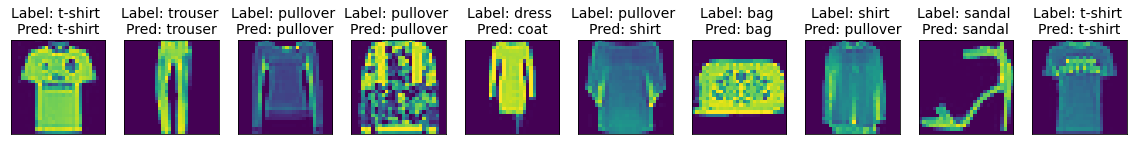

In [0]:
_, figs = plt.subplots(1, 10, figsize=(20, 50))

for f, x, yi, pyi in zip(figs, X, y, preds):
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title("Label: %s \nPred: %s" % (text_labels[yi], text_labels[pyi]))
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Resources

1. Coursera: Machine Learning by Andrew Ng (https://www.coursera.org/learn/machine-learning/home/welcome)
2. Google Machine Learning Crash Course (https://developers.google.com/machine-learning/crash-course/ml-intro)
3. Washington University: Jeff Heaton (https://github.com/jeffheaton/t81_558_deep_learning)

# Coronavirus

1. Keep up hygeine
2. Only travel if absolutely necessary
3. Social responsibility
    * Call before going to see doctors if:
        * Have symptoms (Fever, coughing, diarrhoea, vomiting, sore throat, respiratory symptoms)
        * Leave Emergency Rooms for emergencies only
4. Keep updated (Department of Health)
5. Plan: **NOT to overwhelm the public health system**

![Thank you](https://drive.google.com/uc?id=105rnTXz1r8E-R74IJ7HkaTaZnKEY2wCC)

